Datensatz: https://www.kaggle.com/datasets/mikeytracegod/lung-cancer-risk-dataset <br>
Anforderung an das Paper: (10-12 Seiten)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

dataset = pd.read_csv("lung_cancer_dataset.csv")

# Convert text to categorical data
dataset['gender'] = dataset['gender'].astype('category')
dataset['radon_exposure'] = dataset['radon_exposure'].astype('category')
dataset['alcohol_consumption'] = dataset['alcohol_consumption'].fillna('None').astype('category')

# Map Yes/No to True/False
dataset['asbestos_exposure'] = dataset['asbestos_exposure'].map({'Yes': True, 'No': False})
dataset['secondhand_smoke_exposure'] = dataset['secondhand_smoke_exposure'].map({'Yes': True, 'No': False})
dataset['copd_diagnosis'] = dataset['copd_diagnosis'].map({'Yes': True, 'No': False})
dataset['family_history'] = dataset['family_history'].map({'Yes': True, 'No': False})
dataset['lung_cancer'] = dataset['lung_cancer'].map({'Yes': True, 'No': False})

# get the data and target from the data frame 
data = dataset.loc[:, 'age':'family_history']
target = dataset['lung_cancer']

# split the data into training and test sets
train_data, test_data, train_label, test_label = train_test_split(data, target, test_size=0.3, random_state=0)

# Identify categorical and numeric columns
categorical_cols = data.select_dtypes(include=['category']).columns.tolist()
numeric_cols = data.select_dtypes(include=['number', 'bool']).columns.tolist()

# Preprocessing-Transformer (numeric: RobustScaler, categorical: OneHotEncoder)
preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_cols), # RobustScaler() could be added here
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
])

X_processed = preprocessor.fit_transform(train_data)

Visualisierung der numerischen Spalten

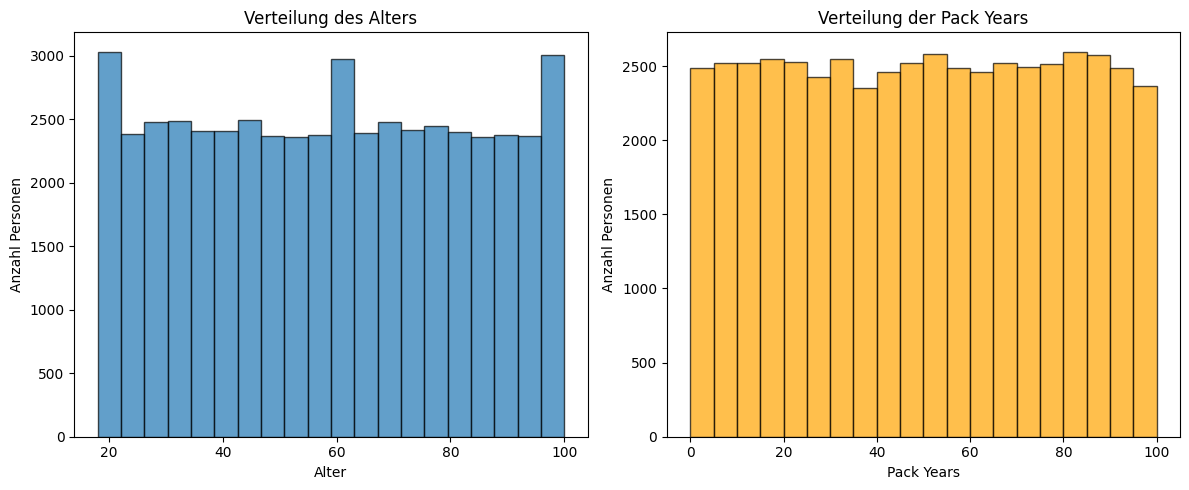

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(dataset['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Verteilung des Alters')
plt.xlabel('Alter')
plt.ylabel('Anzahl Personen')

plt.subplot(1, 2, 2)
plt.hist(dataset['pack_years'], bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Verteilung der Pack Years')
plt.xlabel('Pack Years')
plt.ylabel('Anzahl Personen')

plt.tight_layout()
plt.show()